# Attendance and Stadium analysis

In [69]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [71]:
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
df.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   appearance_id                4199 non-null   object 
 1   game_id_x                    4199 non-null   int64  
 2   player_id_x                  4199 non-null   int64  
 3   competition_id_x             4199 non-null   object 
 4   yellow_cards                 4199 non-null   int64  
 5   red_cards                    4199 non-null   int64  
 6   goals                        4199 non-null   int64  
 7   assists                      4199 non-null   int64  
 8   minutes_played               4199 non-null   int64  
 9   season                       4199 non-null   int64  
 10  round                        4199 non-null   object 
 11  home_club_goals              4199 non-null   int64  
 12  away_club_goals              4199 non-null   int64  
 13  home_club_position

### KNN Classification:

In [76]:
df = pd.DataFrame(df)

In [78]:
knn_df = df[['attendance','competition_type','stadium','goals','player_name_y','season']]
knn_df

,attendance,competition_type,stadium,goals,player_name_y,season
0,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
1,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
2,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
3,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
4,45033.0,domestic_league,Max-Morlock-Stadion,0,Timothy Chandler,2012
...,...,...,...,...,...,...
4194,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4195,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4196,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020
4197,3200.0,domestic_league,Olympisch Stadion,1,Joseph Efford,2020


In [80]:
#Label Encoding
#encoding for competition_type variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['competition_type'])
print(purpose_encoder.classes_)
knn_df['competition_type.enc']=purpose_encoder.transform(knn_df['competition_type'])

['domestic_cup' 'domestic_league' 'international_cup' 'other']


In [82]:
#encoding for stadium variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['stadium'])
print(purpose_encoder.classes_)
knn_df['stadium.enc']=purpose_encoder.transform(knn_df['stadium'])

[' Bremer Brucke' 'AFAS Stadion' 'AMEX Stadium' 'Aalborg Portland Park'
 'Allianz Arena' 'Allianz Riviera' 'Anfield'
 'Argosstadion Achter de Kazerne' 'Audi Sportpark' 'BUKO Stadion'
 'BayArena' 'Blue Water Arena' 'Bramall Lane' 'Brondby Stadium'
 'Carrow Road' 'Cegeka Arena' 'Celtic Park' 'Ceres Park'
 'Civitas Metropolitano' 'Commerzbank Arena'
 'Constant Vanden Stock Stadion' 'Craven Cottage' 'DS Arena'
 'Daknamstadion' 'Decathlon Arena-Stade Pierre-Mauroy' 'Diaz Arena'
 'Dreisamstadion' 'Edmund-Plambeck-Stadion' 'Ernst-Abbe-Sportfeld'
 'Erve Asito' 'Etihad Stadium' 'Euroborg' 'Fortuna Sittard Stadion'
 'Freethielstadion' 'Friedrich Ludwig Jahn Sportpark'
 'GP Stadion am Hardtwald' 'Ghelamco Arena' 'Groupama Stadium'
 'Guldensporenstadion' 'Heinz-von-Heiden-Arena' 'Helsingor Stadium'
 'Herfolge stadium' 'Het Kuipje' 'Home Deluxe Arena' 'JYSK Park'
 'Jahnstadion Regensburg' 'Jan-Breydel-Stadion' 'Johan Cruijff ArenA'
 'King Power Stadium' 'Koning Willem II Stadion' 'Le Canonnier'
 'L

In [84]:
#encoding for player_name_y variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['player_name_y'])
print(purpose_encoder.classes_)
knn_df['player_name_y.enc']=purpose_encoder.transform(knn_df['player_name_y'])

['Andrija Novakovich' 'Caleb Stanko' 'Christian Cappis'
 'Christian Pulisic' 'Desevio Payne' 'Emmanuel Sabbi' 'Erik Palmer-Brown'
 'Giovanni Reyna' 'John Anthony Brooks' 'Jonathan Amon' 'Jordan'
 'Joseph Efford' 'Josh Sargent' 'Julian Green' 'Kenny Saief'
 'Luca de la Torre' 'Lynden Gooch' 'Sergino Dest' 'Terrence Boyd'
 'Tim Ream' 'Timothy Chandler' 'Timothy Weah' 'Tyler Adams'
 'Weston McKennie']


In [86]:
#define categories(bins) and labels for attendance column
knn_df['attendance_c']=np.where(knn_df['attendance']>knn_df['attendance'].median(),'High attendance','low attendance')
#print the number of unique values
print(f"number of unique values:[log1_df['attendance_c'].unique()]")

number of unique values:[log1_df['attendance_c'].unique()]


In [88]:
#encoding for attendance_c variable
purpose_encoder = preprocessing.LabelEncoder()
purpose_encoder.fit(knn_df['attendance_c'])
print(purpose_encoder.classes_)
knn_df['attendance.enc']=purpose_encoder.transform(knn_df['attendance_c'])

['High attendance' 'low attendance']


In [90]:
#removing competition_type,stadium,player_name_y,attendance columns from the data
columns_to_drop = ["competition_type","stadium","player_name_y","attendance"]
knn_df = knn_df.drop(columns_to_drop,axis=1)
knn_df

,goals,season,competition_type.enc,stadium.enc,player_name_y.enc,attendance_c,attendance.enc
0,0,2012,1,60,20,High attendance,0
1,0,2012,1,60,20,High attendance,0
2,0,2012,1,60,20,High attendance,0
3,0,2012,1,60,20,High attendance,0
4,0,2012,1,60,20,High attendance,0
...,...,...,...,...,...,...,...
4194,1,2020,1,72,11,low attendance,1
4195,1,2020,1,72,11,low attendance,1
4196,1,2020,1,72,11,low attendance,1
4197,1,2020,1,72,11,low attendance,1


In [92]:
#retrieving competition_type.enc and attendance.enc column from the dataset and storing into anothet dataframe
attcomp_col_df = pd.DataFrame(knn_df[['attendance.enc','competition_type.enc']])

#removing attendance.enc and column from the dataset as scaling is not required for this column
df2 = pd.DataFrame(knn_df.drop(['attendance.enc','competition_type.enc'],axis=1))

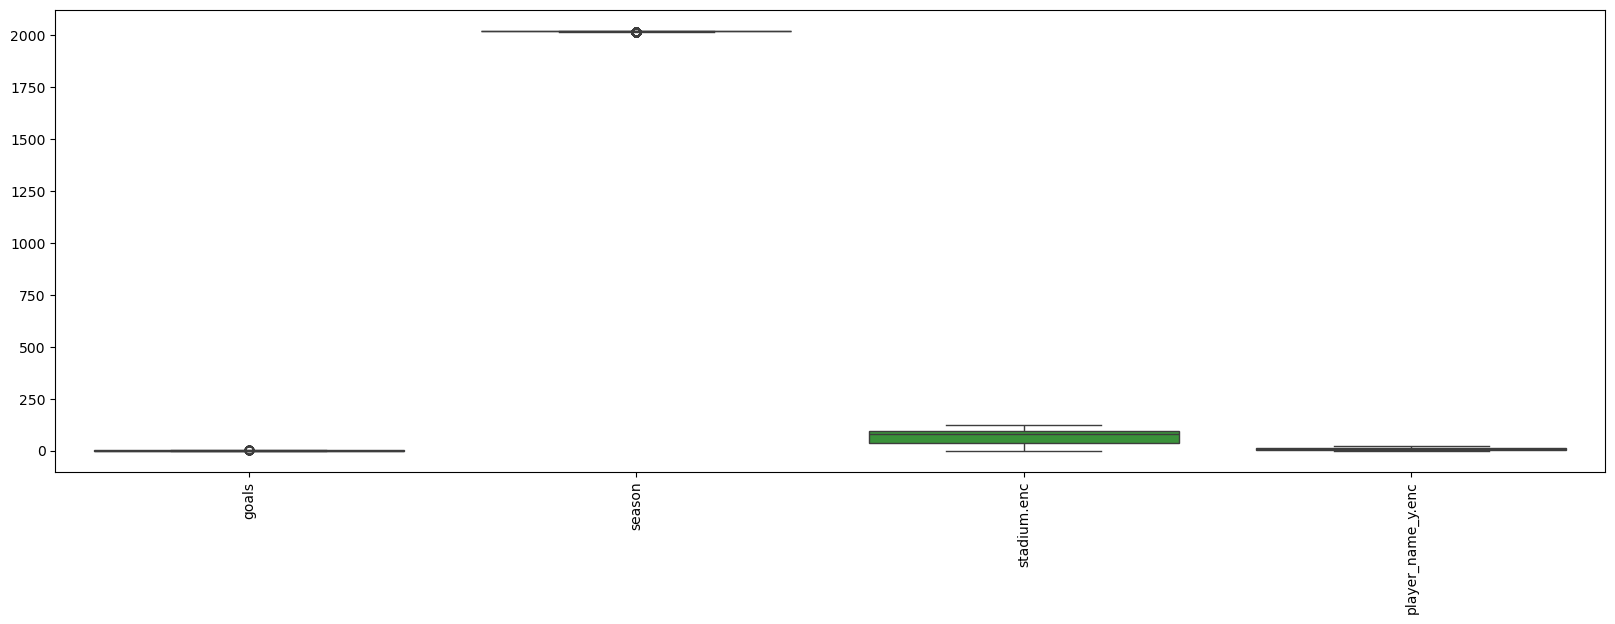

In [94]:
#outlier assessment
sns.boxplot(data=df2)
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation=90)
plt.show()

In [95]:
#Outlier Treatment
def iqr_winsorization(df,thresh=1.5):
  df_numeric = df.select_dtypes(include=[np.number])
  columns_to_treat =df_numeric.columns

  for col in columns_to_treat:
    Q1 =df_numeric[col].quantile(0.25)
    Q3 =df_numeric[col].quantile(0.75)
    IQR = Q3-Q1
    #define fences
    lower_fence = Q1-thresh*IQR
    upper_fence = Q3+thresh*IQR
    #winsorize outliers
    df_numeric.loc[df_numeric[col]<lower_fence,col]=lower_fence
    df_numeric.loc[df_numeric[col]>upper_fence,col]=upper_fence
  return df_numeric
df=pd.DataFrame(df2)
#perform outlier treatment on all columns
treated_df2 = iqr_winsorization(df.copy())
print(treated_df2)

      goals  season  stadium.enc  player_name_y.enc
0       0.0    2014           60               20.0
1       0.0    2014           60               20.0
2       0.0    2014           60               20.0
3       0.0    2014           60               20.0
4       0.0    2014           60               20.0
...     ...     ...          ...                ...
4194    1.0    2020           72               11.0
4195    1.0    2020           72               11.0
4196    1.0    2020           72               11.0
4197    1.0    2020           72               11.0
4198    1.0    2020           72               11.0

[4199 rows x 4 columns]


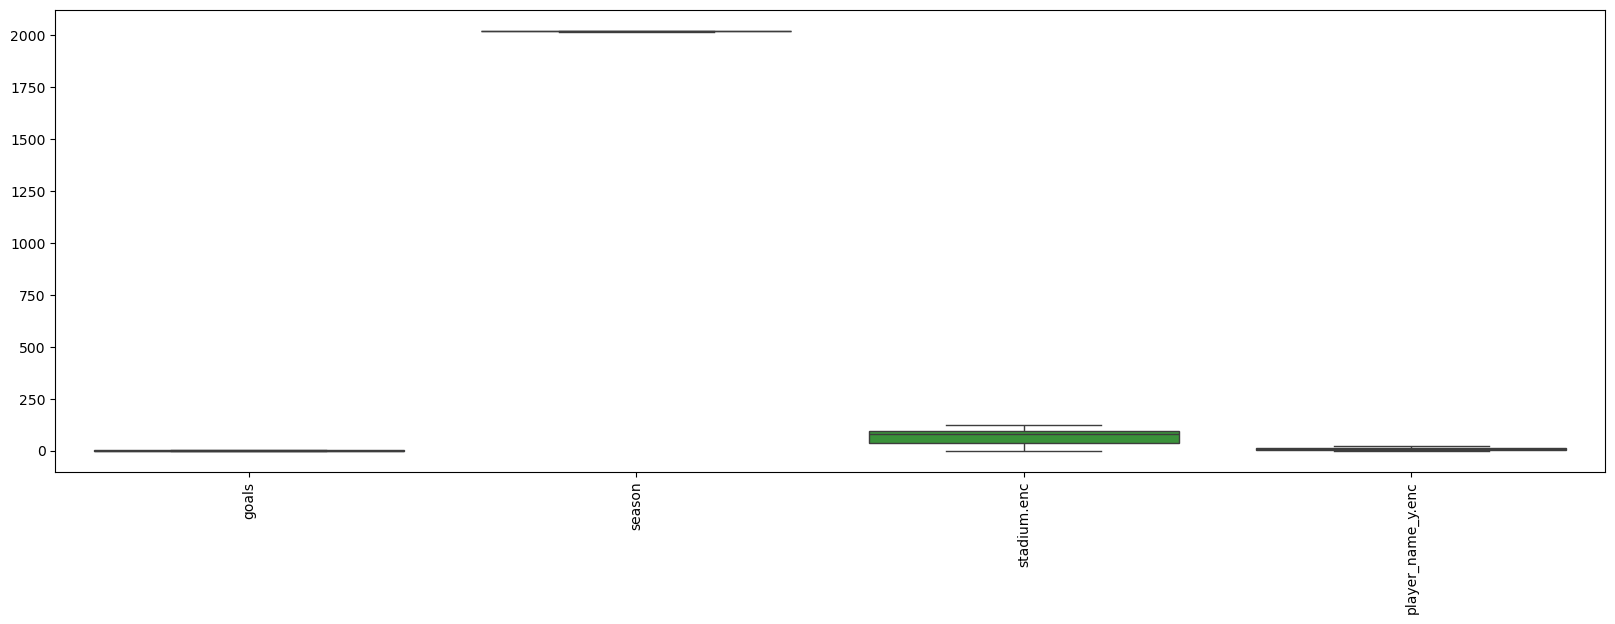

In [96]:
sns.boxplot(data=treated_df2)
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation=90)
plt.show()

In [99]:
#Scaling data
cols = treated_df2.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(treated_df2)
df_scaled = pd.DataFrame(df_scaled,columns=cols)
df_scaled.head()

,goals,season,stadium.enc,player_name_y.enc
0,-0.733861,-2.176423,-0.261157,1.544203
1,-0.733861,-2.176423,-0.261157,1.544203
2,-0.733861,-2.176423,-0.261157,1.544203
3,-0.733861,-2.176423,-0.261157,1.544203
4,-0.733861,-2.176423,-0.261157,1.544203


In [100]:
#append the competition_type.enc and attendance.enc column to the scaled DataFrame
df_scaled = pd.concat([df_scaled,attcomp_col_df],axis=1)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   goals                 4199 non-null   float64
 1   season                4199 non-null   float64
 2   stadium.enc           4199 non-null   float64
 3   player_name_y.enc     4199 non-null   float64
 4   attendance.enc        4199 non-null   int32  
 5   competition_type.enc  4199 non-null   int32  
dtypes: float64(4), int32(2)
memory usage: 164.2 KB


In [102]:
#check multicollinearity among independent variables
#selecting the cutoff value as 0.7
abs(df_scaled.corr())>0.7

,goals,season,stadium.enc,player_name_y.enc,attendance.enc,competition_type.enc
goals,True,False,False,False,False,False
season,False,True,False,False,False,False
stadium.enc,False,False,True,False,False,False
player_name_y.enc,False,False,False,True,False,False
attendance.enc,False,False,False,False,True,False
competition_type.enc,False,False,False,False,False,True


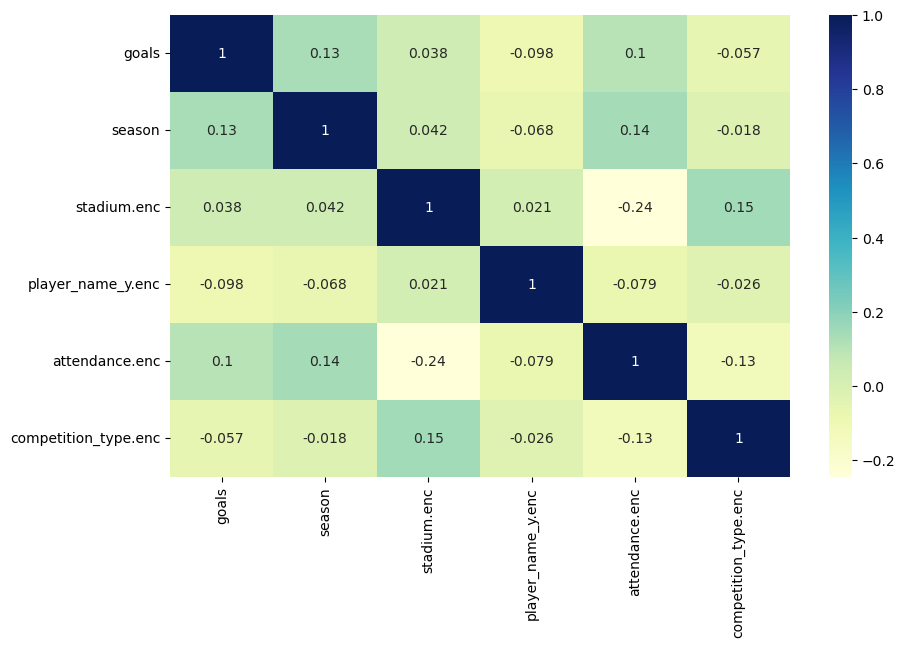

In [105]:
#plotting heatmap
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax = sns.heatmap(df_scaled.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [107]:
#creating test and training datasets
attn_train,attn_test=train_test_split(df_scaled,train_size=0.8,shuffle=True,random_state=0)
print("size of trainiing dataset: ",attn_train.shape)
print("size of test dataset: ",attn_test.shape)

size of trainiing dataset:  (3359, 6)
size of test dataset:  (840, 6)


In [108]:
x_train = attn_train.drop(columns='attendance.enc',axis=1)
y_train=attn_train['attendance.enc']
x_test=attn_test.drop(columns='attendance.enc',axis=1)
y_test=attn_test['attendance.enc']
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3359, 5), (3359,), (840, 5), (840,))

Minium error:- 0.011904761904761904 at k= 1


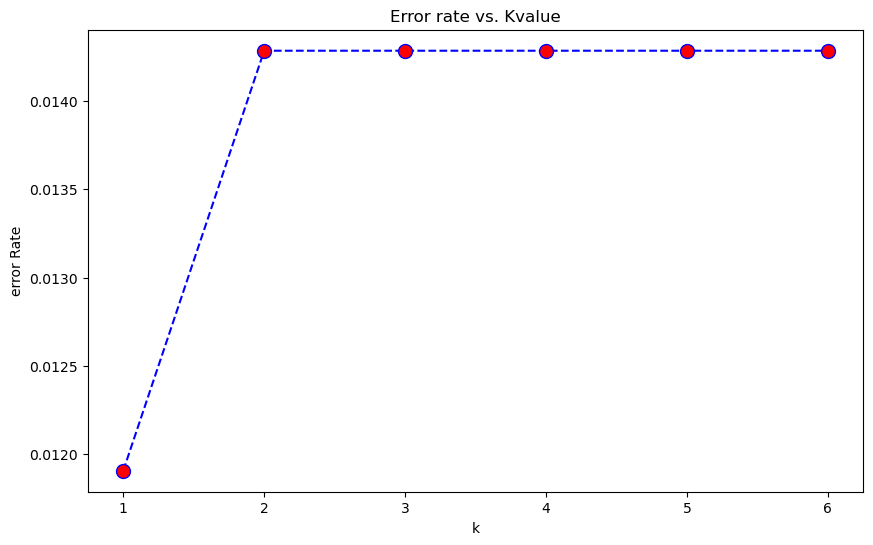

In [109]:
#Finding optimal k value
from sklearn import neighbors
error_rate =[]
for i in range(1,7):
  clf_food = neighbors.KNeighborsClassifier(n_neighbors=i)
  clf_food.fit(x_train,y_train)
  pred_i = clf_food.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,7),error_rate,color='blue',linestyle="dashed",marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs. Kvalue')
plt.xlabel('k')
plt.ylabel('error Rate')
print("Minium error:-",min(error_rate),"at k=",error_rate.index(min(error_rate))+1)
plt.show()

In [112]:
k=3
#Building the model
from sklearn import neighbors
#learning the classifier
clf = neighbors.KNeighborsClassifier(k)
clf.fit(x_train,y_train)
#using the trained model to predict the outcome of the x_test dataset
y_pred = clf.predict(x_test)

In [116]:
#model properties
print(clf.classes_)
print(clf.n_neighbors)

[0 1]
3


In [118]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
print(tn,fp,fn,tp)

[[411   1]
 [ 11 417]]
411 1 11 417


In [129]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', accuracy_score(y_test, y_pred))#Combining the True positive and true negative cases
print('recall:', recall_score(y_test, y_pred)) #Prediction got True negative cases
print('f1-score:', f1_score(y_test, y_pred)) #Prediction for True positive cases
print('precision:', precision_score(y_test, y_pred))# Prediction fot True positive cases

accuracy: 0.9857142857142858
recall: 0.9742990654205608
f1-score: 0.9858156028368794
precision: 0.9976076555023924


In [122]:
# ROC Score
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
roc

0.9882667180836584

#### The KNN model exhibits excellent performance with high accuracy (0.9857), recall (0.9743), precision (0.9976), and F1-score (0.9858). The ROC-AUC score of 0.9883 further confirms its strong ability to distinguish between classes. These results suggest that the KNN model is highly effective in classifying the data with minimal misclassifications.

<Figure size 1000x800 with 0 Axes>

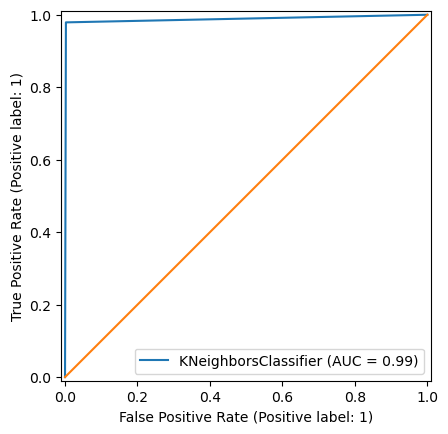

In [127]:
# ROC curve
#from sklearn.metrics import plot_roc_curve
#from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(10,8))
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.plot([0,1],[0,1])
plt.show()

#### Interpretation:The ROC curve for the KNN classifier demonstrates exceptional performance with an AUC of 0.99. This indicates that the model has a high ability to distinguish between positive and negative classes. The curve closely hugs the top-left corner of the plot, suggesting that the model achieves a high true positive rate (sensitivity) while maintaining a low false positive rate (specificity). This exceptional performance suggests that the KNN model is highly effective in classifying the data.In essence, the ROC curve visually confirms that the KNN classifier is highly accurate and reliable in predicting the positive class.